Debug classification

In [66]:
import gzip
from reddit.utils import load_tfrecord
import json
import numpy as np
from pathlib import Path
import glob
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import tensorflow as tf
import random
from IPython.display import Markdown, display

Load model performance metrics

In [202]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [78]:
ls ../logs/classification/test1/metrics/BatchTransformer-6layers-nodense-noint-cls-distilbert_base_uncased/classification-loss/epoch-0

log.json


In [136]:
#p = '../logs/classification/testconc/metrics/BatchTransformer-6layers-nodense-noint-cls-distilbert_base_uncased/classification-loss/epoch-0'
p2 = '../logs/classification/1post/metrics/BatchTransformer-6layers-nodense-noint-cls-distilbert_base_uncased/classification-loss/epoch-0'

In [117]:
d = json.load(open(p+'/log.json'))
d2= json.load(open(p2+'/log.json'))

In [56]:
dsp = '../reddit/data/datasets/classification/1post/train/*'
t = glob.glob(dsp)
ds = load_tfrecord(t, ds_type='classification')

In [36]:
print([d['example_ids'][i] for i in [928,  929,  930,  931]])
print([d['example_ids'][i] for i in [924,  925,  926,  927]])

[724383, 1154383, 1674383, 1404383]
[634546, 1564546, 1694546, 1514546]


In [37]:
print([d['labels'][i] for i in [928,  929,  930,  931]])
print([d['labels'][i] for i in [924,  925,  926,  927]])

[[1], [0], [0], [0]]
[[1], [0], [1], [1]]


In [38]:
print([d['losses'][i] for i in [928,  929,  930,  931]])
print([d['losses'][i] for i in [924,  925,  926,  927]])

[nan, nan, nan, nan]
[1.3758958578109741, 0.15938811004161835, 1.7746155261993408, 1.5938396453857422]


In [ ]:
#[880227, 1210227, 1500227, 380227]

In [65]:
print([d['example_ids'][i] for i in [4220, 4221, 4222, 4223]])
print([d['example_ids'][i] for i in [4216, 4217, 4218, 4219]])
#print([d['labels'][i] for i in [924,  925,  926,  927]])

[237122, 947122, 197122, 207122]
[637344, 1567344, 1697344, 1517344]


In [91]:
#[d['dists'][i-4] for i in np.where(np.isnan(d['losses']))[0][:4]]
[d['probs'][i-14] for i in np.where(np.isnan(d['losses']))[0][:10]]

[0.07751183211803436,
 0.09015282243490219,
 0.07904186099767685,
 0.13211624324321747,
 0.12383998930454254,
 0.07673866301774979,
 0.08004007488489151,
 0.1518581360578537,
 0.16699257493019104,
 0.05685124546289444]

In [210]:
p = '../logs/classification/testbnorm/metrics/BatchTransformer-6layers-nodense-noint-cls-distilbert_base_uncased/classification-loss/epoch-0'
d = json.load(open(p+'/log.json'))

/home/roberta/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/roberta/.local/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


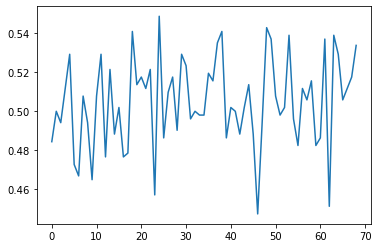

In [211]:
sns.lineplot(x=range(len(np.arange(0, 1000000, 128))), 
             y=[np.mean(d['metrics'][i:i+128]) for i in np.arange(0, 1000000, 128)])

/home/roberta/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/roberta/.local/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


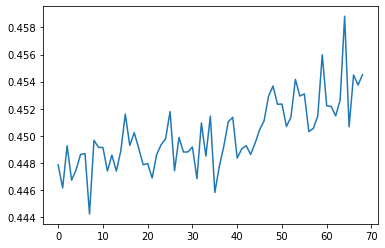

In [212]:
sns.lineplot(x=range(len(np.arange(0, 1000000, 128))), 
             y=[np.mean(d['probs'][i:i+128]) for i in np.arange(0, 1000000, 128)])

/home/roberta/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/roberta/.local/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


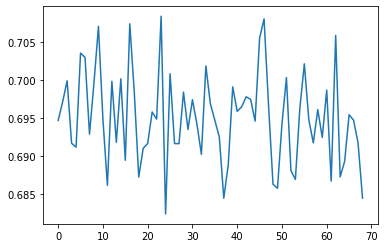

In [213]:
sns.lineplot(x=range(len(np.arange(0, 1000000, 128))), 
             y=[np.mean(d['losses'][i:i+128]) for i in np.arange(0, 1000000, 128)])

Load baselines